# Prediccion Bimbo (Finanzas Empresariales)

### Objetivo

La demanda futura de cada producto
Es decir, predecir cuántas unidades se deben enviar a cada cliente, en cada semana, para evitar tanto el exceso como la escasez de producto.

## Visualizamos los datos

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("train/train.csv", nrows=1000000)
print(df.head())

   Semana  Agencia_ID  Canal_ID  Ruta_SAK  Cliente_ID  Producto_ID  \
0       3        1110         7      3301       15766         1212   
1       3        1110         7      3301       15766         1216   
2       3        1110         7      3301       15766         1238   
3       3        1110         7      3301       15766         1240   
4       3        1110         7      3301       15766         1242   

   Venta_uni_hoy  Venta_hoy  Dev_uni_proxima  Dev_proxima  Demanda_uni_equil  
0              3      25.14                0          0.0                  3  
1              4      33.52                0          0.0                  4  
2              4      39.32                0          0.0                  4  
3              4      33.52                0          0.0                  4  
4              3      22.92                0          0.0                  3  


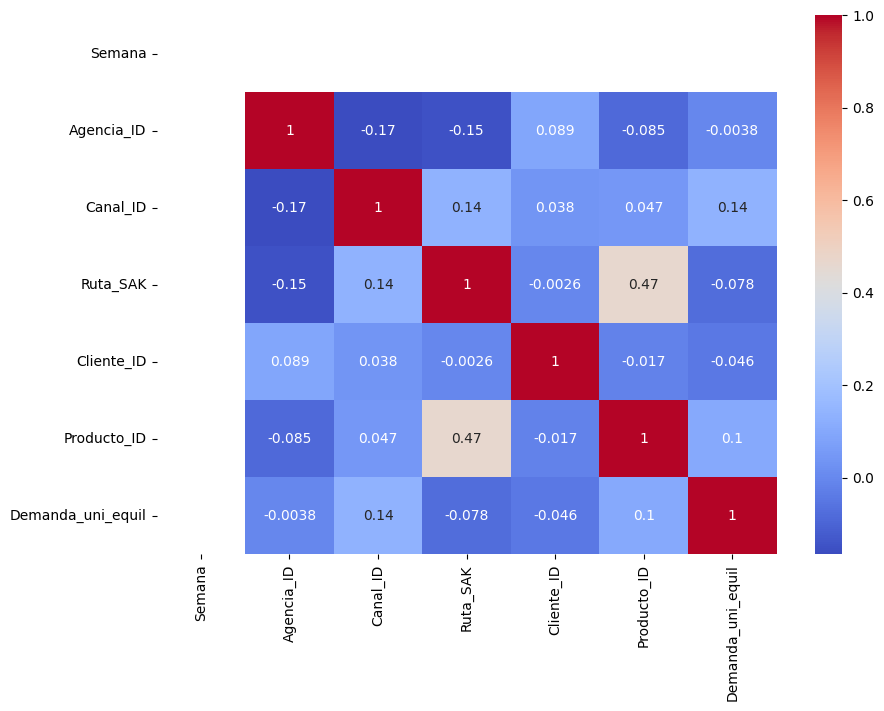

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[["Semana","Agencia_ID","Canal_ID","Ruta_SAK","Cliente_ID","Producto_ID","Demanda_uni_equil"]].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


## Entrenamos el modelo con Random Forest Regressor

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[["Semana", "Agencia_ID", "Canal_ID", "Ruta_SAK", 
        "Cliente_ID", "Producto_ID", "Venta_uni_hoy", 
        "Venta_hoy", "Dev_uni_proxima", "Dev_proxima"]]
y = df["Demanda_uni_equil"]
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
rf_model = RandomForestRegressor(
    n_estimators=50,   
    max_depth=15,      
    n_jobs=-1,         
    random_state=42
)

# Entrenar
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, n_jobs=-1, random_state=42)

## Prediccion para un nuevo cliente

In [16]:
nuevo = pd.DataFrame({
    "Semana":[8],
    "Agencia_ID":[1110],
    "Canal_ID":[1],
    "Ruta_SAK":[1301],
    "Cliente_ID":[425664],
    "Producto_ID":[123456]
})

pred_nueva = rf_model.predict(nuevo)
print("Predicción demanda unidades:", np.expm1(pred_nueva)[0])

Predicción demanda unidades: 1.0522572546199829
